# 1. Import một số thư viện cần thiết


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf


# Đọc dữ liệu từ tệp CSV
df = pd.read_csv('SAB.csv')

# Chọn cột Price và loại bỏ các giá trị thiếu

df = df[['Price']].dropna().reset_index(drop=True)

#2 Phân chia dữ liệu thành tập huấn luyện, kiểm tra và validation theo tỉ lệ 7:2:1

In [32]:

train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size + test_size]
val_data = df[train_size + test_size:]

# Tiến hành training mô hình AR
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])


#3. tìm số lượng lag phù hợp cho mô hình

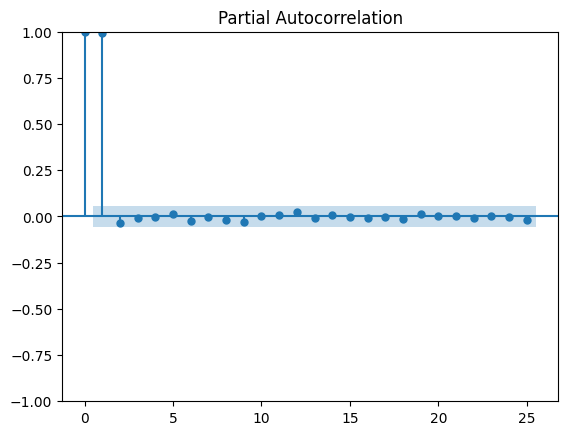

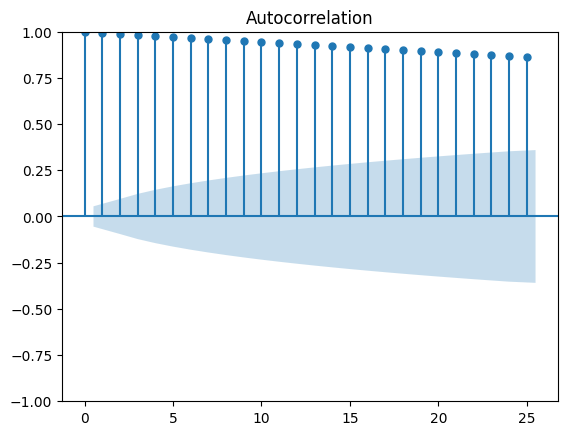

In [33]:
pacf= plot_pacf(df['Price'],lags=25)
acf= plot_acf(df['Price'],lags=25)

#4 Dự đoán giá trong 30 ngày tới

In [34]:
model = AutoReg(y_train, lags=1)   # Lấy lag là 1, tức là mô hình AR(1)
model_fit = model.fit()

# Dự đoán trên tập kiểm tra
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Dự đoán trên tập validation
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val = model_fit.predict(start=len(train_data) + len(test_data), end=len(train_data) + len(test_data) + len(val_data) - 1, dynamic=False)

# Tạo index cho 30 ngày tiếp theo
last_index = df.index[-1]
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)

# Dự đoán giá cho 30 ngày tiếp theo
y_next_30_days = model_fit.predict(start=len(df), end=len(df) + 29, dynamic=False)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[172441.48201676 172432.19422427 172422.9415608  172413.72389347
 172404.54108993 172395.39301831 172386.27954724 172377.20054586
 172368.15588379 172359.14543114 172350.16905854 172341.22663707
 172332.31803833 172323.4431344  172314.60179781 172305.79390163
 172297.01931936 172288.277925   172279.56959303 172270.89419839
 172262.25161652 172253.64172329 172245.06439507 172236.5195087
 172228.00694147 172219.52657113 172211.07827592 172202.66193451
 172194.27742604 172185.92463012]


#5 Đánh giá độ chính xác thuật toán

In [35]:
# Tính toán các chỉ số đánh giá RMSE, MSE, MAPE

test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

val_mse = mean_squared_error(y_val, y_pred_val)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_pred_val)
val_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)
print('Validation RMSE:', val_rmse)
print('Validation MAE:', val_mae)
print('Validation MAPE:', val_mape)

Testing RMSE: 16721.11903014806
Testing MAE: 11402.291761895685
Testing MAPE: 7.771506479196233
Validation RMSE: 110151.14207841817
Validation MAE: 110044.40405748936
Validation MAPE: 176.08556954236238


#6. Vẽ biểu đồ

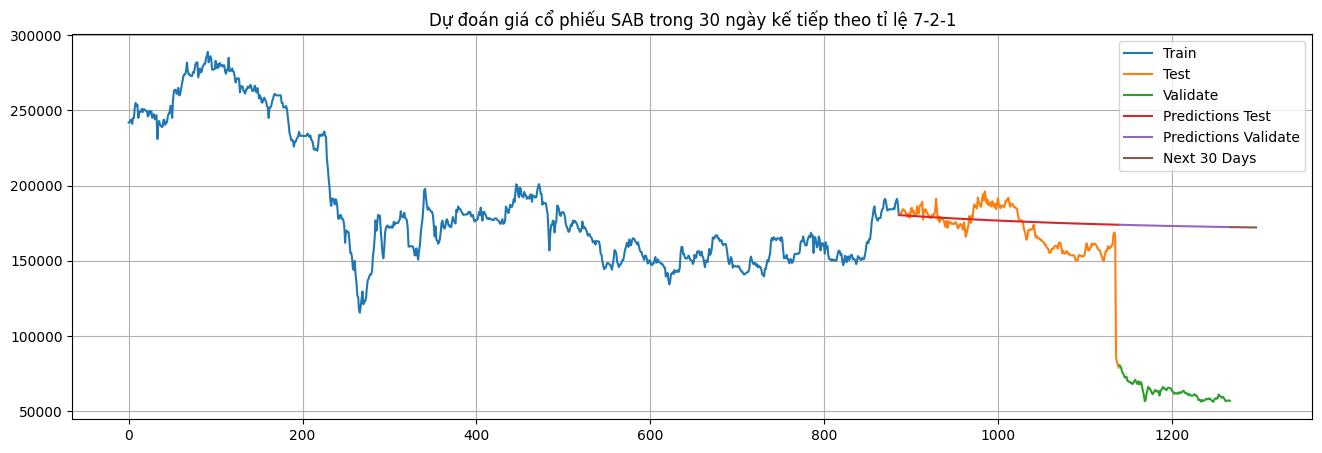

In [37]:
# Vẽ biểu đồ
plt.figure(figsize=(16,5))
plt.title("Dự đoán giá cổ phiếu SAB trong 30 ngày kế tiếp theo tỉ lệ 7-2-1")
plt.grid(True)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(x_next_30_days, y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions Test', 'Predictions Validate', 'Next 30 Days'])
plt.show()

#7. Chia tập dữ liệu để train-test-validate theo tỉ lệ 6:3:1



In [38]:
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size + test_size]
val_data = df[train_size + test_size:]

# Tiến hành training mô hình AR
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

#8. Tìm số lượng lag phù hợp

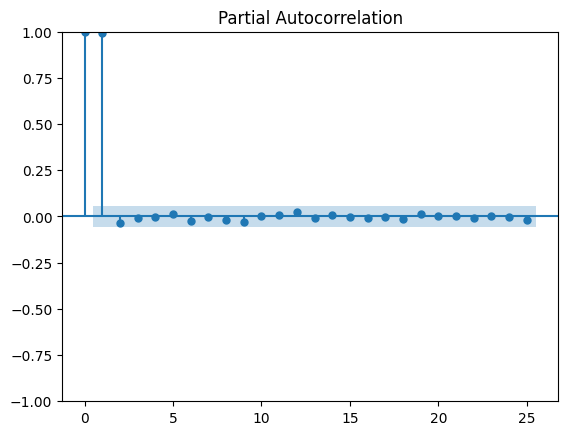

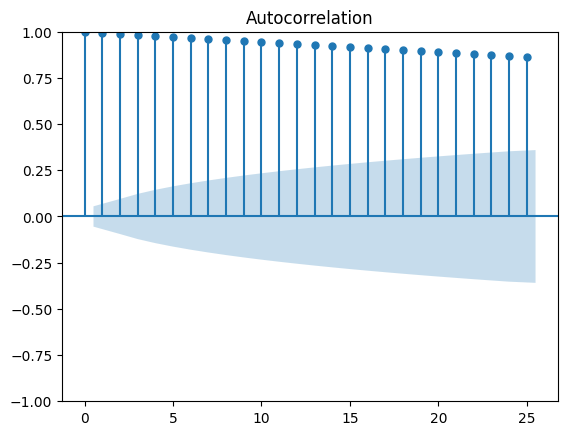

In [39]:
pacf= plot_pacf(df['Price'],lags=25)
acf= plot_acf(df['Price'],lags=25)

#9.Dự đoán trong 30 ngày tới


In [40]:
model = AutoReg(y_train, lags=1)   # Lấy lag là 1, tức là mô hình AR(1)
model_fit = model.fit()

# Dự đoán trên tập kiểm tra
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Dự đoán trên tập validation
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val = model_fit.predict(start=len(train_data) + len(test_data), end=len(train_data) + len(test_data) + len(val_data) - 1, dynamic=False)

# Tạo index cho 30 ngày tiếp theo
last_index = df.index[-1]
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)

# Dự đoán giá cho 30 ngày tiếp theo
y_next_30_days = model_fit.predict(start=len(df), end=len(df) + 29, dynamic=False)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[152438.81666252 152439.99645971 152441.17270142 152442.34539836
 152443.51456121 152444.68020063 152445.84232722 152447.00095158
 152448.15608426 152449.30773578 152450.45591664 152451.6006373
 152452.74190817 152453.87973967 152455.01414214 152456.14512594
 152457.27270135 152458.39687866 152459.5176681  152460.63507988
 152461.74912418 152462.85981115 152463.96715091 152465.07115354
 152466.1718291  152467.26918763 152468.3632391  152469.4539935
 152470.54146075 152471.62565077]


#10. Đánh giá độ chính xác thuật toán

In [41]:
# Tính toán các chỉ số đánh giá RMSE, MSE, MAPE

test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

val_mse = mean_squared_error(y_val, y_pred_val)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_pred_val)
val_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)
print('Validation RMSE:', val_rmse)
print('Validation MAE:', val_mae)
print('Validation MAPE:', val_mape)

Testing RMSE: 23159.26827399941
Testing MAE: 18333.76383173448
Testing MAPE: 10.74946859293666
Validation RMSE: 89399.50105514826
Validation MAE: 89243.90528932215
Validation MAPE: 142.96774641181833


#11. Vẽ biểu đồ

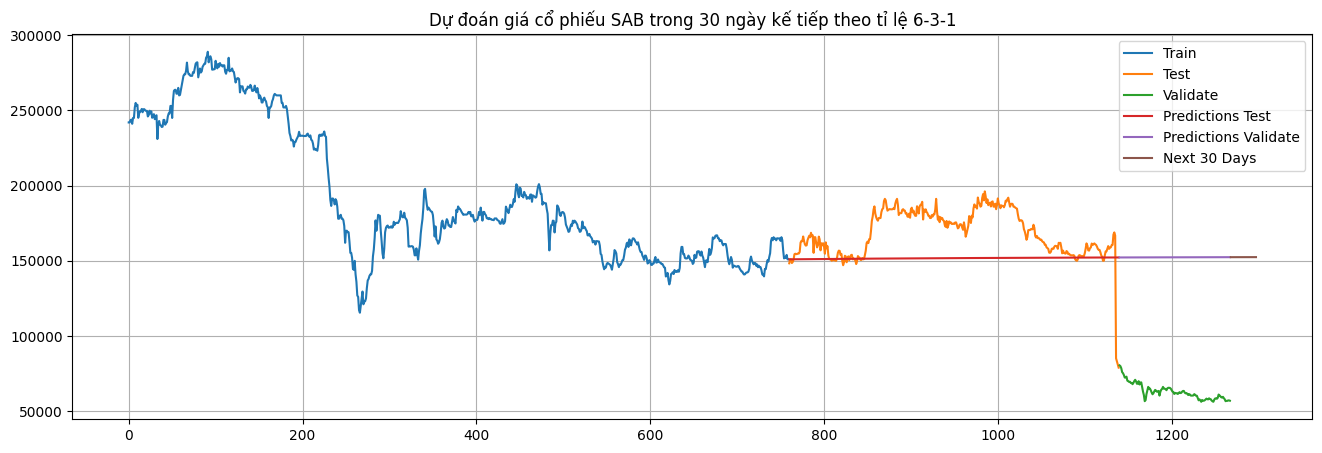

In [42]:
# Vẽ biểu đồ
plt.figure(figsize=(16,5))
plt.title("Dự đoán giá cổ phiếu SAB trong 30 ngày kế tiếp theo tỉ lệ 6-3-1")
plt.grid(True)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(x_next_30_days, y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions Test', 'Predictions Validate', 'Next 30 Days'])
plt.show()

#12. Chia tập dữ liệu để train-test-validate theo tỉ lệ 5:3:2

In [43]:
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size + test_size]
val_data = df[train_size + test_size:]

# Tiến hành training mô hình AR
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

#13. Tìm số lượng lag phù hợp

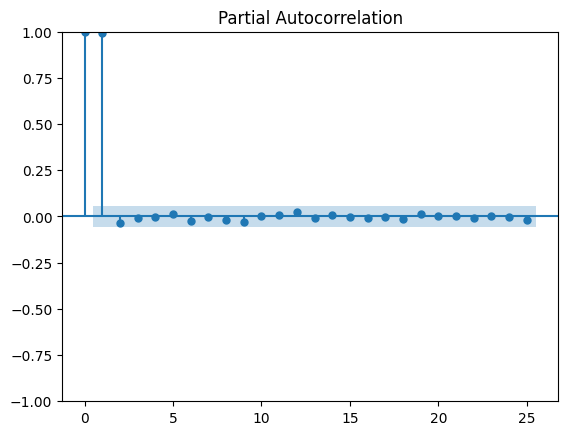

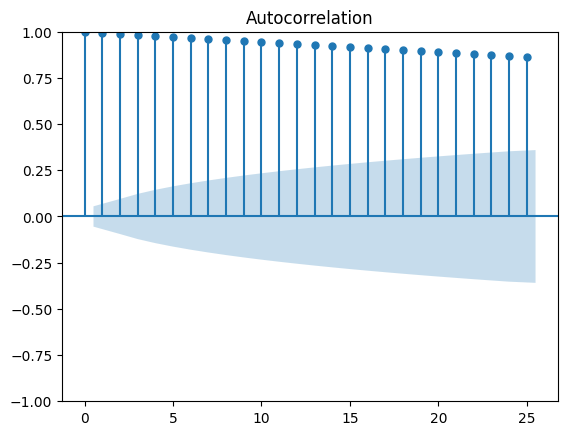

In [44]:
pacf= plot_pacf(df['Price'],lags=25)
acf= plot_acf(df['Price'],lags=25)

#14. Dự đoán 30 ngày tới

In [45]:
model = AutoReg(y_train, lags=1)   # Lấy lag là 1, tức là mô hình AR(1)
model_fit = model.fit()

# Dự đoán trên tập kiểm tra
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Dự đoán trên tập validation
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val = model_fit.predict(start=len(train_data) + len(test_data), end=len(train_data) + len(test_data) + len(val_data) - 1, dynamic=False)

# Tạo index cho 30 ngày tiếp theo
last_index = df.index[-1]
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)

# Dự đoán giá cho 30 ngày tiếp theo
y_next_30_days = model_fit.predict(start=len(df), end=len(df) + 29, dynamic=False)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[136319.94671418 136315.60767771 136311.27894733 136306.96049858
 136302.65230702 136298.35434829 136294.06659808 136289.78903216
 136285.52162633 136281.26435646 136277.01719847 136272.78012834
 136268.55312212 136264.3361559  136260.12920583 136255.93224813
 136251.74525906 136247.56821493 136243.40109214 136239.24386712
 136235.09651635 136230.95901638 136226.83134382 136222.71347532
 136218.6053876  136214.50705742 136210.41846161 136206.33957705
 136202.27038067 136198.21084946]


#15. Đánh giá độ chính xác thuật toán

In [46]:
# Tính toán các chỉ số đánh giá RMSE, MSE, MAPE

test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

val_mse = mean_squared_error(y_val, y_pred_val)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_pred_val)
val_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)
print('Validation RMSE:', val_rmse)
print('Validation MAE:', val_mae)
print('Validation MAPE:', val_mape)

Testing RMSE: 30871.773320720735
Testing MAE: 26181.01357879436
Testing MAPE: 14.993622139724138
Validation RMSE: 55931.04357316868
Validation MAE: 49955.156102875786
Validation MAPE: 67.73884589044893


#16. Vẽ biểu đồ

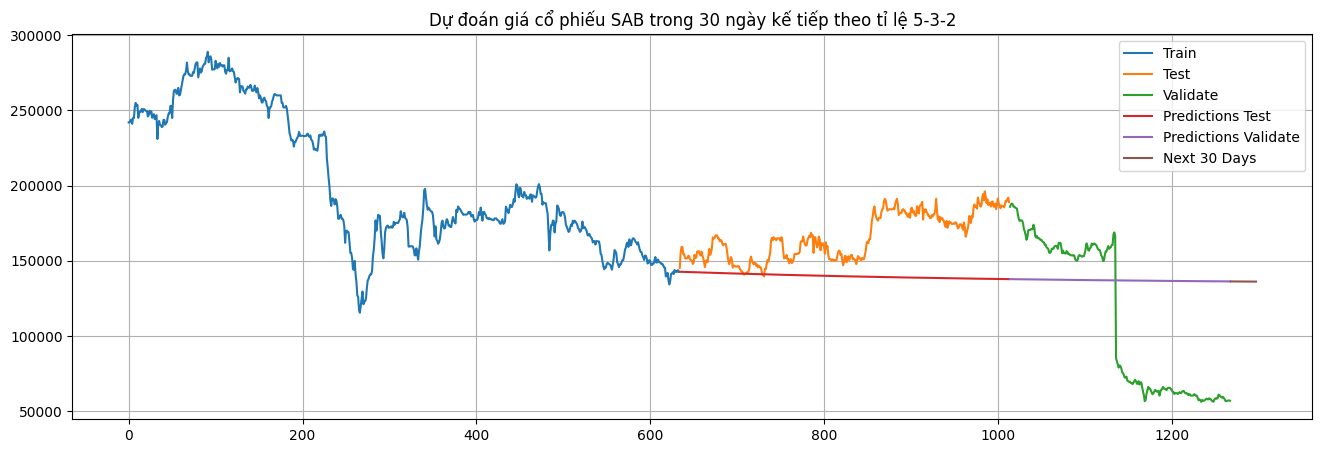

In [48]:
# Vẽ biểu đồ
plt.figure(figsize=(16,5))
plt.title("Dự đoán giá cổ phiếu SAB trong 30 ngày kế tiếp theo tỉ lệ 5-3-2")
plt.grid(True)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(x_next_30_days, y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions Test', 'Predictions Validate', 'Next 30 Days'])
plt.show()